In [1]:
import pandas as pd
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Variables

Outputs:
- Einkommen: 82000-07-01-4, verfügbare Jahre: 2000-2022
- Arbeitslose: 13211-01-03-4, verfügbare Jahre: 2001-2024

Inputs:
- MS-Leistungen: 22811-01-01-4, verfügbare Jahre: 2010-2022
- Erwerbstätige: 13312-01-05-4, verfügbare Jahre: 2000-2022
- Fläche: 11111-01-01-4 verfügbare Jahre: 1995-2023
- Medianalter: 12411-10-01-4, Verfügbare Jahre: 2011 - 2022
- Schulen: 21111-01-03-4, verfügbare Jahre: 1995 - 2023
- Beschäftigte: 13111-12-03-4, verfügbare Jahre: 2008-2024  (!!!)
- Einwohner: 12411-0015_de, verfügbare Jahre: anpassen, mit Altersgruppen: 12411-0018
- Ausländer: 12521-0040_de, verfügbare Jahre: anpassen

--> Time range: 2011-2022: 11 years

Short time ranges:
- Bevölkerung (>15, ISCED Bildungsstand): 12211-Z-08, verfügbare Jahre: 2011-2019
- Bildung: 12211-Z-08, verfügbare Jahre: 2011 - 2019


Others:
- Armutsgefährdung: 22811-Z-54, verfügbare Jahre: 2005-2019


### Einwohnerzahl Dataset
select the age range 15-65 (able to work)

In [2]:
Jahre = []
for i in range(2011, 2023):
    Jahre += 476*[i]

df_demografie = pd.read_csv("Datasets_2011-2022/12411-0018_de.csv", delimiter=";").drop(columns=["Unnamed: 37"]) #kreisebene, Jahre: 2011-2022, mit Altersgruppen
df_demografie["Jahr"] = Jahre

df_ausländer = pd.read_csv("Datasets_2011-2022/12521-0040_de.csv", delimiter=";").drop(columns=["Unnamed: 6"]) #kreisebene, Jahre: 2011-2022
df_ausländer["Jahr"] = Jahre
display(df_ausländer)

df_demografie_selagerange = df_demografie[['Jahr', 'Code', 'Name']].copy()
m15to65 = df_demografie[['15 bis unter 18 Jahre', '18 bis unter 20 Jahre',
       '20 bis unter 25 Jahre', '25 bis unter 30 Jahre',
       '30 bis unter 35 Jahre', '35 bis unter 40 Jahre',
       '40 bis unter 45 Jahre', '45 bis unter 50 Jahre',
       '50 bis unter 55 Jahre', '55 bis unter 60 Jahre',
       '60 bis unter 65 Jahre']].apply(pd.to_numeric, errors='coerce').sum(axis=1, min_count=1)
w15to65 = df_demografie[['15 bis unter 18 Jahre.1',
       '18 bis unter 20 Jahre.1', '20 bis unter 25 Jahre.1',
       '25 bis unter 30 Jahre.1', '30 bis unter 35 Jahre.1',
       '35 bis unter 40 Jahre.1', '40 bis unter 45 Jahre.1',
       '45 bis unter 50 Jahre.1', '50 bis unter 55 Jahre.1',
       '55 bis unter 60 Jahre.1', '60 bis unter 65 Jahre.1']].apply(pd.to_numeric, errors='coerce').sum(axis=1, min_count=1)
df_demografie_selagerange['15-65, m'] = m15to65
df_demografie_selagerange['15-65, w'] = w15to65

,Jahr,Code,Name,Ausländer (m),Ausländer (w),Ausländer
0,2011,1001,"Flensburg, kreisfreie Stadt",3422,3335,6757
1,2011,1002,"Kiel, kreisfreie Stadt",9395,9279,18674
2,2011,1003,"Lübeck, kreisfreie Stadt",8048,7841,15889
3,2011,1004,"Neumünster, kreisfreie Stadt",2517,2385,4902
4,2011,1051,"Dithmarschen, Landkreis",1814,1861,3675
...,...,...,...,...,...,...
5707,2022,16073,"Saalfeld-Rudolstadt, Landkreis",2790,2535,5325
5708,2022,16074,Saale-Holzland-Kreis,2235,2010,4245
5709,2022,16075,Saale-Orla-Kreis,2470,1940,4405
5710,2022,16076,"Greiz, Landkreis",2330,1855,4180


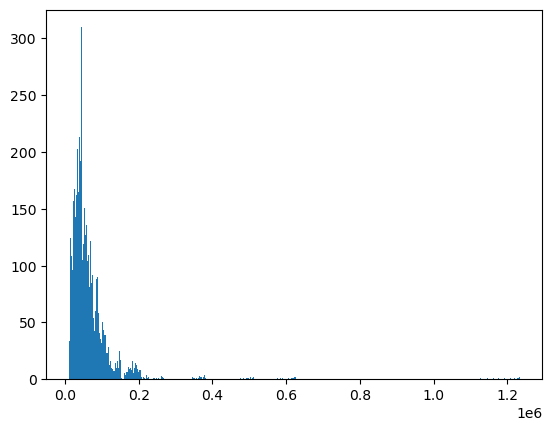

In [3]:
plt.hist(df_demografie_selagerange['15-65, m'], bins=500)
plt.show()
# plt.xlim(0,6e5)

In [4]:
df_demografie_selagerange['15-65, m']

0       28240.0
1       81677.0
2       66961.0
3       25214.0
4       42289.0
         ...   
5707    30506.0
5708    25392.0
5709    24024.0
5710    27962.0
5711    25660.0
Name: 15-65, m, Length: 5712, dtype: float64

In [5]:
df_ausländer['Ausländer']

0        6757
1       18674
2       15889
3        4902
4        3675
        ...  
5707     5325
5708     4245
5709     4405
5710     4180
5711     5770
Name: Ausländer, Length: 5712, dtype: object

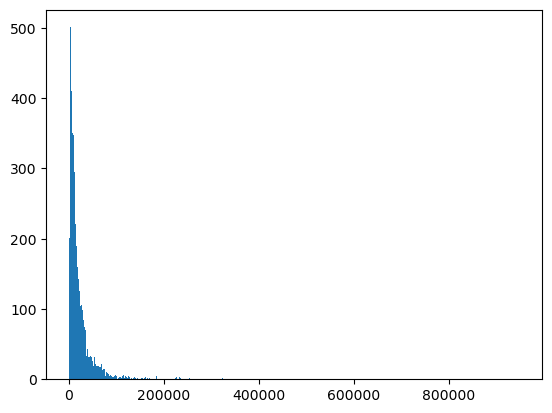

In [6]:
plt.hist(df_ausländer['Ausländer'].apply(pd.to_numeric, errors='coerce'), bins=500)
plt.show()

In [7]:
print(df_ausländer['Ausländer'].apply(pd.to_numeric, errors='coerce').max())
print(np.where(df_ausländer['Ausländer'].apply(pd.to_numeric, errors='coerce')==490510))
df_ausländer["Name"][5566]

949375.0
(array([], dtype=int64),)


'Berlin, kreisfreie Stadt'

In [8]:
df_ausländer[df_ausländer["Name"] == 'Berlin, kreisfreie Stadt']

,Jahr,Code,Name,Ausländer (m),Ausländer (w),Ausländer
330,2011,11000,"Berlin, kreisfreie Stadt",240032,231238,471270
806,2012,11000,"Berlin, kreisfreie Stadt",244799,236197,480996
1282,2013,11000,"Berlin, kreisfreie Stadt",250852,241048,491900
1758,2014,11000,"Berlin, kreisfreie Stadt",255752,245262,501014
2234,2015,11000,"Berlin, kreisfreie Stadt",299612,273189,572801
2710,2016,11000,"Berlin, kreisfreie Stadt",330025,297780,627805
3186,2017,11000,"Berlin, kreisfreie Stadt",482645,405910,888555
3662,2018,11000,"Berlin, kreisfreie Stadt",419115,376275,795390
4138,2019,11000,"Berlin, kreisfreie Stadt",425705,387005,812705
4614,2020,11000,"Berlin, kreisfreie Stadt",431290,392700,823985


## Einwohner

In [9]:
df_einwohner = pd.read_csv("Datasets_2011-2022/12411-0016_de.csv", delimiter=";").drop(columns=["Unnamed: 6"]) #kreisebene, Jahre: 2011-2022
df_einwohner["Jahr"] = Jahre
df_einwohner



,Jahr,Code,Name,Einwohner (m),Einwohner (w.),Einwohner
0,2011,1001,"Flensburg, kreisfreie Stadt",40713,42088,82801
1,2011,1002,"Kiel, kreisfreie Stadt",114654,123013,237667
2,2011,1003,"Lübeck, kreisfreie Stadt",100056,110623,210679
3,2011,1004,"Neumünster, kreisfreie Stadt",37769,39432,77201
4,2011,1051,"Dithmarschen, Landkreis",65393,68094,133487
...,...,...,...,...,...,...
5707,2022,16073,"Saalfeld-Rudolstadt, Landkreis",49733,51823,101556
5708,2022,16074,Saale-Holzland-Kreis,41353,42242,83595
5709,2022,16075,Saale-Orla-Kreis,38851,39553,78404
5710,2022,16076,"Greiz, Landkreis",46978,48303,95281


## Restliche Datasets

In [10]:
df_einkommen = pd.read_csv("Datasets_2011-2022/82000-07-01-4.csv", delimiter=";")
print(df_einkommen.keys())
df_arbeitslose = pd.read_csv("Datasets_2011-2022/13211-01-03-4.csv", delimiter=";")
print(df_arbeitslose.keys())
df_mindestsicherungsleistungen = pd.read_csv("Datasets_2011-2022/22811-01-01-4.csv", delimiter=";") 
print(df_mindestsicherungsleistungen.keys())
df_altenquotient = pd.read_csv("Datasets_2011-2022/12411-10-01-4.csv", delimiter=";")[["Jahr", "Code", "Name", "Altenquotient"]] 
df_altenquotient[["Altenquotient"]] = df_altenquotient[["Altenquotient"]].replace(',', '.', regex=True)
print(df_altenquotient.keys())
df_erwerbstätige = pd.read_csv("Datasets_2011-2022/13312-01-05-4.csv", delimiter=";") #
df_erwerbstätige[['Erwerbstätige (tot.)', 'A', 'B-E', 'C', 'F','G-J', 'V', 'Ö']] = df_erwerbstätige[['Erwerbstätige (tot.)', 'A', 'B-E', 'C', 'F','G-J', 'V', 'Ö']].replace(',', '.', regex=True)
print(df_erwerbstätige.keys())
df_fläche = pd.read_csv("Datasets_2011-2022/11111-01-01-4.csv", delimiter=";") 
df_fläche[["Fläche"]] = df_fläche[["Fläche"]].replace(',', '.', regex=True)
print(df_fläche.keys())




for df in [df_einkommen, df_mindestsicherungsleistungen, df_arbeitslose, df_erwerbstätige, df_fläche, df_altenquotient]:
    df['Code'] = df['Code'].astype(str).str.lstrip('0')
    df['Code'] = df['Code'].replace('', 0)



Index(['Jahr', 'Code', 'Name', 'Einkommen (tot.)', 'Einkommen'], dtype='object')
Index(['Jahr', 'Code', 'Name', 'Arbeitslose', 'Arbeitslose (ausl.)',
       'Arbeitslose (s.beh.)', 'Arbeitslose (15-20)', 'Arbeitslose (15-25)',
       'Arbeitslose (55-65)', 'langzeitarbeitslos'],
      dtype='object')


Index(['Jahr', 'Code', 'Name', 'MSL (tot.)', 'SGB II (tot.)',
       'SGB II (erwerbsf.)', 'SGB II (n.erwerbsf.)', 'SGB XII (Lebensunt.)',
       'SGB XII (Grundsicher.)', 'Regelleist. (Asyl)'],
      dtype='object')
Index(['Jahr', 'Code', 'Name', 'Altenquotient'], dtype='object')
Index(['Jahr', 'Code', 'Name', 'Erwerbstätige (tot.)', 'A', 'B-E', 'C', 'F',
       'G-J', 'V', 'Ö'],
      dtype='object')
Index(['Jahr', 'Code', 'Name', 'Fläche'], dtype='object')


### Beschäftigte Dataset

In [11]:
#13111-12-03-4

df_beschäftigte = pd.read_csv("Datasets_2011-2022/13111-12-03-4.csv", delimiter=";")
df_beschäftigte

,Jahr,Code,Name,Abschluss,"Beschäftigte (tot., tot.)","Beschäftigte (tot., m)","Beschäftigte (tot., w)","Beschäftigte (ausl., tot.)","Beschäftigte (ausl., m)","Beschäftigte (ausl., w)"
0,2022,0,Deutschland,ohne Berufsabschluss,4316005,2517350,1798655,1209639,786439,423200
1,2022,0,Deutschland,mit anerkanntem Berufsabschluss,20579379,10675220,9904159,1551952,949648,602304
2,2022,0,Deutschland,mit akademischem Abschluss,6425383,3403032,3022351,840799,441108,399691
3,2022,0,Deutschland,Insgesamt,34211493,18305427,15906066,4777618,2953658,1823960
4,2022,1,Schleswig-Holstein,ohne Berufsabschluss,143250,83354,59896,26197,17736,8461
...,...,...,...,...,...,...,...,...,...,...
25819,2011,16076,"Greiz, Landkreis",Insgesamt,38894,20498,18396,191,117,74
25820,2011,16077,"Altenburger Land, Landkreis",ohne Berufsabschluss,2080,1190,890,25,16,9
25821,2011,16077,"Altenburger Land, Landkreis",mit anerkanntem Berufsabschluss,27633,15186,12447,89,57,32
25822,2011,16077,"Altenburger Land, Landkreis",mit akademischem Abschluss,3272,1667,1605,15,11,4


In [12]:
df_beschäftigte_tot = df_beschäftigte[["Jahr", "Code", "Name", "Abschluss", "Beschäftigte (tot., tot.)"]]
df_beschäftigte_ausl = df_beschäftigte[["Jahr", "Code", "Name", "Abschluss", "Beschäftigte (ausl., tot.)"]]


df_beschäftigte_tot = (
    df_beschäftigte_tot
    .pivot(index=["Jahr", "Code"], columns="Abschluss", values="Beschäftigte (tot., tot.)")
    .reset_index()  # Don't drop=True!
    .rename_axis(None, axis=1)
    .apply(pd.to_numeric, errors="coerce")
)

# df_beschäftigte_tot["Code"] = df_arbeitslose["Code"]
# df_beschäftigte_tot["Jahr"] = df_arbeitslose["Jahr"]

df_beschäftigte_ausl = (df_beschäftigte_ausl
 .pivot(index=["Jahr","Code"],columns='Abschluss', values='Beschäftigte (ausl., tot.)')
 .reset_index() 
 .rename_axis(None, axis=1)
 .apply(pd.to_numeric, errors='coerce')
)
# df_beschäftigte_ausl["Code"] = df_arbeitslose["Code"]
# df_beschäftigte_ausl["Jahr"] = df_arbeitslose["Jahr"]

df_beschäftigte_tot = df_beschäftigte_tot.rename(columns=dict(zip(['Insgesamt', 'mit akademischem Abschluss',
       'mit anerkanntem Berufsabschluss', 'ohne Berufsabschluss', 'Code',
       'Jahr'], ['Beschäftigte (tot.)', 'mit akademischem Abschluss (tot.)',
       'mit anerkanntem Berufsabschluss (tot.)', 'ohne Berufsabschluss (tot.)', 'Code',
       'Jahr'])))

df_beschäftigte_ausl = df_beschäftigte_ausl.rename(columns=dict(zip(['Insgesamt', 'mit akademischem Abschluss',
       'mit anerkanntem Berufsabschluss', 'ohne Berufsabschluss', 'Code',
       'Jahr'], ['Beschäftigte (ausl.)', 'mit akademischem Abschluss (ausl.)',
       'mit anerkanntem Berufsabschluss (ausl.)', 'ohne Berufsabschluss (ausl.)', 'Code',
       'Jahr'])))

In [13]:
df_beschäftigte_tot.isna().sum()

Jahr                                         0
Code                                         0
Beschäftigte (tot.)                       1065
mit akademischem Abschluss (tot.)         1514
mit anerkanntem Berufsabschluss (tot.)    1514
ohne Berufsabschluss (tot.)               1514
dtype: int64

### School dataset is different and is loaded here

In [14]:
df_schulen1995 = pd.read_csv("Datasets/21111-01-03-4_1995.csv", delimiter=";")[["Jahr", "Code", "Schulen", "Anzahl Schulen"]] # kreisebene, Jahr 1995
df_schulen2022 = pd.read_csv("Datasets/21111-01-03-4_2022.csv", delimiter=";")[["Jahr", "Code", "Schulen", "Anzahl Schulen"]] # kreisebene, Jahr 2022

display(df_schulen1995)

code = df_arbeitslose.Code.unique()

Schulen_keys = ['Abendschulen und Kollegs', 'Freie Waldorfschulen', 'Grundschulen',
       'Gymnasien', 'Hauptschulen', 'Integrierte Gesamtschulen',
       'Realschulen', 'Schularten mit mehreren Bildungsgängen',
       'Schulartunabhängige Orientierungsstufe', 'Sonderschulen/ Förderschulen',
       'Vorschulbereich']
df_schulen1995 = (df_schulen1995
                  .pivot(index="Code",columns='Schulen', values='Anzahl Schulen')
                  .reset_index(drop=True)
                  .rename(columns={'Schulartunabh?ngige Orientierungsstufe':'Schulartunabhängige Orientierungsstufe',
                                   'Sonderschulen/F?rderschulen':'Sonderschulen/ Förderschulen', 
                                   'Schularten mit mehreren Bildungsg?ngen':'Schularten mit mehreren Bildungsgängen'})
                  .drop(columns=["Insgesamt"])
                  .rename_axis(None, axis=1))

df_schulen1995["Code"] = code



df_schulen2022 = (df_schulen2022
                  .pivot(index="Code",columns='Schulen', values='Anzahl Schulen')
                  .reset_index(drop=True)
                  .rename(columns={'Schulartunabh?ngige Orientierungsstufe':'Schulartunabhängige Orientierungsstufe',
                                   'Sonderschulen/F?rderschulen':'Sonderschulen/ Förderschulen', 
                                   'Schularten mit mehreren Bildungsg?ngen':'Schularten mit mehreren Bildungsgängen'})
                  .drop(columns=["Insgesamt"])
                  .rename_axis(None, axis=1))
df_schulen2022["Code"] = code


for key in Schulen_keys:
       df_schulen1995 = df_schulen1995.rename(columns={key:key+" (1995)"})
       df_schulen2022 = df_schulen2022.rename(columns={key:key+" (2022)"})


df_schulen1995 = df_schulen1995.replace({'-':'0', '.':'0', 'x':'0'})
df_schulen1995[df_schulen1995.keys()] = df_schulen1995[df_schulen1995.keys()].apply(pd.to_numeric, errors='coerce')

df_schulen2022 = df_schulen2022.replace({'-':'0', '.':'0', 'x':'0'})
df_schulen2022[df_schulen2022.keys()] = df_schulen2022[df_schulen2022.keys()].apply(pd.to_numeric, errors='coerce')

df_schulen1995 = pd.concat(12*[df_schulen1995]).reset_index(drop=True)
df_schulen2022 = pd.concat(12*[df_schulen2022]).reset_index(drop=True)

df_schulen1995["Jahr"] = df_arbeitslose.Jahr
df_schulen2022["Jahr"] = df_arbeitslose.Jahr


feature_cols1995 = [col for col in df_schulen1995.columns if col not in ['Jahr', 'Code', 'Name']]
feature_cols2022 = [col for col in df_schulen2022.columns if col not in ['Jahr', 'Code', 'Name']]

def normalize_selected(group, feature_cols=feature_cols1995):
    normed = group.copy()
    base = group.iloc[0][feature_cols]
    normed.loc[1:, feature_cols] = group.iloc[1:][feature_cols] / base
    return normed

df_schulen1995 = df_schulen1995.groupby("Jahr", group_keys=False).apply(normalize_selected, feature_cols = feature_cols1995)
df_schulen2022 = df_schulen2022.groupby("Jahr", group_keys=False).apply(normalize_selected, feature_cols = feature_cols2022)


df_schulen1995

,Jahr,Code,Schulen,Anzahl Schulen
0,1995,0,Vorschulbereich,4141
1,1995,0,Grundschulen,17910
2,1995,0,Schulartunabh?ngige Orientierungsstufe,2358
3,1995,0,Hauptschulen,6132
4,1995,0,Schularten mit mehreren Bildungsg?ngen,1280
...,...,...,...,...
6451,1995,16077,Integrierte Gesamtschulen,-
6452,1995,16077,Freie Waldorfschulen,-
6453,1995,16077,Sonderschulen/F?rderschulen,4
6454,1995,16077,Abendschulen und Kollegs,-


/tmp/ipykernel_2204237/847938222.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[       nan 0.03092784 0.02405498 0.03092784 0.02061856 0.19243986
 0.08591065 0.01030928 0.24398625 0.05498282 0.01718213 0.10309278
 0.09278351 0.0137457  0.04123711 0.04467354 0.00687285 0.0137457
 0.00687285 0.         0.01030928 0.0652921  0.03436426 0.03436426
 0.02405498 0.03436426 0.04810997 0.02405498 0.0137457  0.00343643
 0.         0.00687285 0.0652921  0.06185567 0.07216495 0.04467354
 0.01718213 0.         0.00687285 0.00687285 0.01030928 0.00687285
 0.00687285 0.02061856 0.0137457  0.00687285 0.02061856 0.0137457
 0.00687285 0.00343643 0.01718213 0.02405498 0.00687285 0.00687285
 0.00687285 0.00343643 0.00343643 0.         0.         0.
 0.         0.         0.00343643 0.         0.         0.
 0.         0.00687285 0.         0.00343643 0.         0.00343643
 0.         0.         0.         0.         0.         

,Abendschulen und Kollegs (1995),Freie Waldorfschulen (1995),Grundschulen (1995),Gymnasien (1995),Hauptschulen (1995),Integrierte Gesamtschulen (1995),Realschulen (1995),Schularten mit mehreren Bildungsgängen (1995),Schulartunabhängige Orientierungsstufe (1995),Sonderschulen/ Förderschulen (1995),Vorschulbereich (1995),Code,Jahr
0,291.000000,161.000000,17910.000000,3168.000000,6132.000000,817.000000,3504.000000,1280.000000,2358.000000,3397.000000,4141.000000,0,2022
1,0.030928,0.062112,0.036404,0.031881,0.050881,0.025704,0.048801,0.000000,0.000000,0.050633,0.084762,1,2022
2,0.024055,0.068323,0.012563,0.023359,0.028865,0.074663,0.022831,0.012500,0.001272,0.015896,0.053127,1001,2022
3,0.030928,0.086957,0.103964,0.082702,0.090183,0.029376,0.125000,0.005469,0.239186,0.090079,0.106013,1002,2022
4,0.020619,0.006211,0.005416,0.022096,0.007175,0.013464,0.012842,0.000000,0.022053,0.008243,0.018353,1003,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16073,2011
6452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16074,2011
6453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16075,2011
6454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16076,2011


In [15]:
df_schulen1995.isna().sum().sum()

121

In [16]:
df_schulen_diff = df_schulen2022 - df_schulen1995

# One unified dataset

In [17]:
df_list = [df_einwohner, df_demografie_selagerange, df_beschäftigte_tot, df_beschäftigte_ausl,
            df_mindestsicherungsleistungen, df_altenquotient, 
            df_erwerbstätige, df_fläche, df_einkommen, df_arbeitslose,
            df_schulen1995, df_schulen2022]
for df in df_list:
    df["Code"] = pd.to_numeric(df["Code"], errors="coerce").astype(int)
df_ausländer["Code"] = pd.to_numeric(df_ausländer["Code"], errors="coerce").astype(int)

In [18]:
df_all = df_ausländer

for df in df_list:
    if "Name" in df.keys():
        df_all = df_all.merge(df.drop(columns=["Name"]), on=['Code', 'Jahr'], how='left')
    else:
        df_all = df_all.merge(df, on=['Code', 'Jahr'], how='left')


In [19]:
df_all.keys()

Index(['Jahr', 'Code', 'Name', 'Ausländer (m)', 'Ausländer (w)', 'Ausländer',
       'Einwohner (m)', 'Einwohner (w.)', 'Einwohner', '15-65, m', '15-65, w',
       'Beschäftigte (tot.)', 'mit akademischem Abschluss (tot.)',
       'mit anerkanntem Berufsabschluss (tot.)', 'ohne Berufsabschluss (tot.)',
       'Beschäftigte (ausl.)', 'mit akademischem Abschluss (ausl.)',
       'mit anerkanntem Berufsabschluss (ausl.)',
       'ohne Berufsabschluss (ausl.)', 'MSL (tot.)', 'SGB II (tot.)',
       'SGB II (erwerbsf.)', 'SGB II (n.erwerbsf.)', 'SGB XII (Lebensunt.)',
       'SGB XII (Grundsicher.)', 'Regelleist. (Asyl)', 'Altenquotient',
       'Erwerbstätige (tot.)', 'A', 'B-E', 'C', 'F', 'G-J', 'V', 'Ö', 'Fläche',
       'Einkommen (tot.)', 'Einkommen', 'Arbeitslose', 'Arbeitslose (ausl.)',
       'Arbeitslose (s.beh.)', 'Arbeitslose (15-20)', 'Arbeitslose (15-25)',
       'Arbeitslose (55-65)', 'langzeitarbeitslos',
       'Abendschulen und Kollegs (1995)', 'Freie Waldorfschulen (1995)'

In [20]:
features_numeric = df_all.drop(columns=['Jahr', 'Code', 'Name']).keys()
df_all[features_numeric] = df_all[features_numeric].apply(pd.to_numeric, errors='coerce')

In [21]:
pd.set_option('display.max_rows', 200)  # Or a higher number
df_all.isna().sum()

Jahr                                                0
Code                                                0
Name                                                0
Ausländer (m)                                     979
Ausländer (w)                                     979
Ausländer                                         979
Einwohner (m)                                     897
Einwohner (w.)                                    897
Einwohner                                         897
15-65, m                                          897
15-65, w                                          897
Beschäftigte (tot.)                               909
mit akademischem Abschluss (tot.)                1309
mit anerkanntem Berufsabschluss (tot.)           1309
ohne Berufsabschluss (tot.)                      1309
Beschäftigte (ausl.)                              909
mit akademischem Abschluss (ausl.)               1309
mit anerkanntem Berufsabschluss (ausl.)          1309
ohne Berufsabschluss (ausl.)

## Filter Dataset

In [22]:
nan_mask = df_all[features_numeric].isna().any(axis=1)
nan_counts = df_all[nan_mask].groupby("Code").size()
with pd.option_context('display.max_rows', None):
    print(nan_counts.sort_values(ascending=False))
    print(list(nan_counts.sort_values(ascending=False).values))
    print(list(nan_counts.sort_values(ascending=False).index))

nan_mask = df_all[features_numeric].isna().any(axis=1)
nan_rows = df_all[nan_mask]
years_with_nans = nan_rows.groupby("Name")["Jahr"].unique()
with pd.option_context('display.max_rows', None):
    print(years_with_nans.sort_index())


Code
13059    12
14171    12
14177    12
14178    12
14181    12
14182    12
14188    12
14191    12
14193    12
14262    12
14263    12
14264    12
14272    12
14280    12
14284    12
14285    12
14286    12
14287    12
14290    12
14292    12
14365    12
5354     12
14374    12
14375    12
14379    12
14173    12
14167    12
14389    12
14166    12
10041    12
10042    12
10043    12
10045    12
10046    12
11000    12
6633     12
13001    12
13002    12
13005    12
13006    12
13051    12
13052    12
13053    12
13054    12
13055    12
13056    12
13057    12
13058    12
13060    12
13061    12
13062    12
14161    12
5313     12
14383    12
15261    12
15303    12
15362    12
15358    12
15357    12
15355    12
15352    12
15101    12
15151    12
15153    12
15364    12
15154    12
15159    12
15171    12
15202    12
15256    12
15260    12
15268    12
15363    12
3253     12
15266    12
3156     12
2000     12
16056    12
3152     12
15367    12
15265    12
3201     12
15370    12

In [23]:
df_filtered = df_all.copy()
codes_toremove = [2000, 15151, 14389, 14383, 14379, 14375, 14374, 14365, 14292, 14290, 14287, 14286, 14285, 14284, 14280, 14272, 14264, 14263, 14262, 14193, 14191, 14188, 14182, 15101, 15153, 3152, 15154, 16056, 15370, 15369, 15367, 15364, 15363, 15362, 15358, 15357, 15355, 15352, 15303, 15268, 15266, 15265, 15261, 15260, 15256, 15202, 15171, 15159, 14181, 14178, 14177, 13053, 13051, 14173, 13005, 13002, 13001, 11000, 10046, 10045, 10043, 10042, 10041, 6633, 5354, 5313, 3253, 3201, 3156, 13052, 13006, 13054, 13061, 14161, 14166, 13055, 14167, 14171, 13062, 13060, 13059, 13058, 13057, 13056, 12071, 3159]
df_filtered = df_filtered[(~df_filtered["Jahr"].isin([2011,2012])) & (~df_filtered["Code"].isin(codes_toremove))]

In [24]:
df_filtered.isna().sum()

Jahr                                             0
Code                                             0
Name                                             0
Ausländer (m)                                    0
Ausländer (w)                                    0
Ausländer                                        0
Einwohner (m)                                    0
Einwohner (w.)                                   0
Einwohner                                        0
15-65, m                                         0
15-65, w                                         0
Beschäftigte (tot.)                              0
mit akademischem Abschluss (tot.)                0
mit anerkanntem Berufsabschluss (tot.)           0
ohne Berufsabschluss (tot.)                      0
Beschäftigte (ausl.)                             0
mit akademischem Abschluss (ausl.)               0
mit anerkanntem Berufsabschluss (ausl.)          0
ohne Berufsabschluss (ausl.)                     0
MSL (tot.)                     

## Replace the remainding NaNs with 0

(or remove rows with NaNs)

In [25]:
df_filtered[features_numeric] = df_filtered[features_numeric].fillna(0)
df_filtered


,Jahr,Code,Name,Ausländer (m),Ausländer (w),Ausländer,Einwohner (m),Einwohner (w.),Einwohner,"15-65, m",...,Freie Waldorfschulen (2022),Grundschulen (2022),Gymnasien (2022),Hauptschulen (2022),Integrierte Gesamtschulen (2022),Realschulen (2022),Schularten mit mehreren Bildungsgängen (2022),Schulartunabhängige Orientierungsstufe (2022),Sonderschulen/ Förderschulen (2022),Vorschulbereich (2022)
952,2013,1001,"Flensburg, kreisfreie Stadt",3969.0,3596.0,7565.0,41344.0,42627.0,83971.0,28682.0,...,0.029167,0.014442,0.024398,0.000000,0.036652,0.000000,0.000000,0.004673,0.011091,0.193869
953,2013,1002,"Kiel, kreisfreie Stadt",10172.0,9836.0,20008.0,117071.0,124462.0,241533.0,83423.0,...,0.095833,0.109542,0.092205,0.073384,0.048416,0.095322,0.289543,0.000000,0.083005,0.179785
954,2013,1003,"Lübeck, kreisfreie Stadt",9098.0,8651.0,17749.0,101689.0,111269.0,212958.0,68031.0,...,0.012500,0.006834,0.004119,0.000000,0.030317,0.000000,0.000000,0.000000,0.001789,0.000829
955,2013,1004,"Neumünster, kreisfreie Stadt",2941.0,2639.0,5580.0,37585.0,39473.0,77058.0,25026.0,...,0.183333,0.180206,0.197719,0.096098,0.166516,0.218129,0.060431,0.000000,0.183184,0.019056
956,2013,1051,"Dithmarschen, Landkreis",2375.0,2263.0,4638.0,65120.0,67545.0,132665.0,42175.0,...,0.050000,0.077176,0.099810,0.121142,0.057014,0.140936,0.010510,0.119626,0.077996,0.243579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,2022,16073,"Saalfeld-Rudolstadt, Landkreis",2790.0,2535.0,5325.0,49733.0,51823.0,101556.0,30506.0,...,0.000000,0.002321,0.002218,0.000000,0.007240,0.000000,0.000000,0.033645,0.005009,0.000000
5708,2022,16074,Saale-Holzland-Kreis,2235.0,2010.0,4245.0,41353.0,42242.0,83595.0,25392.0,...,0.008333,0.002128,0.002535,0.000000,0.005882,0.000000,0.000000,0.029907,0.001431,0.000000
5709,2022,16075,Saale-Orla-Kreis,2470.0,1940.0,4405.0,38851.0,39553.0,78404.0,24024.0,...,0.000000,0.002063,0.001584,0.000000,0.006787,0.000000,0.000000,0.028037,0.002147,0.000000
5710,2022,16076,"Greiz, Landkreis",2330.0,1855.0,4180.0,46978.0,48303.0,95281.0,27962.0,...,0.000000,0.002386,0.001584,0.000000,0.006335,0.000000,0.000000,0.028972,0.002862,0.000000


In [26]:
features = df_filtered.drop(columns=["Jahr","Code","Name",
"Einkommen",
"Arbeitslose",
"Arbeitslose (ausl.)",
"Arbeitslose (s.beh.)",
"Arbeitslose (15-20)",
"Arbeitslose (15-25)",
"Arbeitslose (55-65)"]).keys()

targets = df_filtered[["Einkommen",
"Arbeitslose",
"Arbeitslose (ausl.)",
"Arbeitslose (s.beh.)",
"Arbeitslose (15-20)",
"Arbeitslose (15-25)",
"Arbeitslose (55-65)"]].keys()

In [27]:
scaler_x = StandardScaler()
scaler_y = MinMaxScaler()


df_norm = df_filtered.copy()

df_norm[features] = scaler_x.fit_transform(df_norm[features])
df_norm[targets] = scaler_y.fit_transform(df_norm[targets])

display(df_norm[features].shape)
display(df_norm[targets].shape)

(3900, 57)

(3900, 7)

In [28]:
window_size = 3
windows = {}
target_values = {}

for id, group in df_norm.groupby("Code"):
    id_str = str(id)
    features_x_df = group[features].to_numpy()
    features_y_df = group[targets].to_numpy()[window_size-1:]

    window = sliding_window_view(features_x_df, (window_size, features_x_df.shape[1]))[:, 0, :]

    windows[id_str] = window
    target_values[id_str] = features_y_df


In [29]:
targets

Index(['Einkommen', 'Arbeitslose', 'Arbeitslose (ausl.)',
       'Arbeitslose (s.beh.)', 'Arbeitslose (15-20)', 'Arbeitslose (15-25)',
       'Arbeitslose (55-65)'],
      dtype='object')

In [30]:
len(windows)

390

In [31]:
windows["1001"].shape

(8, 3, 57)

In [32]:
len(windows) * windows["1001"].shape[0] 

3120

In [33]:
np.savez("Data/data_x.npz", **windows)
np.savez("Data/data_y.npz", **target_values)

In [34]:
df_norm.isna().sum()

Jahr                                             0
Code                                             0
Name                                             0
Ausländer (m)                                    0
Ausländer (w)                                    0
Ausländer                                        0
Einwohner (m)                                    0
Einwohner (w.)                                   0
Einwohner                                        0
15-65, m                                         0
15-65, w                                         0
Beschäftigte (tot.)                              0
mit akademischem Abschluss (tot.)                0
mit anerkanntem Berufsabschluss (tot.)           0
ohne Berufsabschluss (tot.)                      0
Beschäftigte (ausl.)                             0
mit akademischem Abschluss (ausl.)               0
mit anerkanntem Berufsabschluss (ausl.)          0
ohne Berufsabschluss (ausl.)                     0
MSL (tot.)                     

In [35]:
df_filtered.to_csv("filtered_dataset.csv", index=False)